In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
COVID_path = "API- CSV/NewCOVID.csv"
Crime_path = "API- CSV/NewCrime.csv"

COVID = pd.read_csv(COVID_path)
Crime = pd.read_csv(Crime_path)


In [6]:
# Combine the data into a single dataset
combined = pd.merge(COVID, Crime, how='outer', on='zip_code')
combined

,Unnamed: 0_x,zip_code,cases,crude_rate_per_100_000,Unnamed: 0_y,firearm_used_flag,report_no,offense,description,sex,age,race
0,3.0,64106.0,186.0,1994.42,3,False,KC20000565,State Warrant Arrest,NaN,F,36.0,B
1,3.0,64106.0,186.0,1994.42,5,False,KC20000663,Outside State Warrant Arrest,NaN,F,50.0,W
2,3.0,64106.0,186.0,1994.42,37,False,KC20004710,Assault (Non-Aggravated),Simple Assault,M,34.0,W
3,3.0,64106.0,186.0,1994.42,49,False,KC20006258,Trespass of Real Property,Trespass of Real Property,M,20.0,W
4,3.0,64106.0,186.0,1994.42,86,False,KC20010753,Buy Report,NaN,M,30.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
60051,NaN,64195.0,NaN,NaN,51072,False,KC20040462,Failure to Return Leased or Rented Property,Motor Vehicle Theft,NaN,NaN,NaN
60052,NaN,66101.0,NaN,NaN,49318,False,KC20046700,Stealing from Auto (Auto Part or Accessory),Vandalism/Destruction of Property,M,28.0,W
60053,NaN,66109.0,NaN,NaN,53425,False,KC20053356,Alcohol Influence Report,Driving Under the Influence,M,35.0,B
60054,NaN,64321.0,NaN,NaN,59627,False,KC20053150,Stealing from Auto (Theft from Auto),Theft From Motor Vehicle,F,22.0,B


In [10]:
combined=combined.rename(columns={"zip_code":"Zip Code","cases":"COVID Cases","crude_rate_per_100_000":"Crude Rate Per 100,000","sex":"Sex"\
                                  ,"firearm_used_flag":"Firearm Used","report_no":"Report Number", "description":"Crime Description","age":"Age", "offense":"Offense", "race":"Race"})
combined.head()

,Unnamed: 0_x,Zip Code,COVID Cases,"Crude Rate Per 100,000",Unnamed: 0_y,Firearm Used,Report Number,Offense,Crime Description,Sex,Age,Race
0,3.0,64106.0,186.0,1994.42,3,False,KC20000565,State Warrant Arrest,NaN,F,36.0,B
1,3.0,64106.0,186.0,1994.42,5,False,KC20000663,Outside State Warrant Arrest,NaN,F,50.0,W
2,3.0,64106.0,186.0,1994.42,37,False,KC20004710,Assault (Non-Aggravated),Simple Assault,M,34.0,W
3,3.0,64106.0,186.0,1994.42,49,False,KC20006258,Trespass of Real Property,Trespass of Real Property,M,20.0,W
4,3.0,64106.0,186.0,1994.42,86,False,KC20010753,Buy Report,NaN,M,30.0,B


In [8]:
#combined.replace(["NaN", 'NaT'], np.nan, inplace = True)
#combined_new = combined.dropna()
#combined_new

NameError: name 'np' is not defined

In [11]:
combined_new=pd.DataFrame(combined)

In [12]:
combined_new.columns

Index(['Unnamed: 0_x', 'Zip Code', 'COVID Cases', 'Crude Rate Per 100,000',
       'Unnamed: 0_y', 'Firearm Used', 'Report Number', 'Offense',
       'Crime Description', 'Sex', 'Age', 'Race'],
      dtype='object')

In [13]:
combined_df=combined_new.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'])
combined_df

,Zip Code,COVID Cases,"Crude Rate Per 100,000",Firearm Used,Report Number,Offense,Crime Description,Sex,Age,Race
0,64106.0,186.0,1994.42,False,KC20000565,State Warrant Arrest,NaN,F,36.0,B
1,64106.0,186.0,1994.42,False,KC20000663,Outside State Warrant Arrest,NaN,F,50.0,W
2,64106.0,186.0,1994.42,False,KC20004710,Assault (Non-Aggravated),Simple Assault,M,34.0,W
3,64106.0,186.0,1994.42,False,KC20006258,Trespass of Real Property,Trespass of Real Property,M,20.0,W
4,64106.0,186.0,1994.42,False,KC20010753,Buy Report,NaN,M,30.0,B
...,...,...,...,...,...,...,...,...,...,...
60051,64195.0,NaN,NaN,False,KC20040462,Failure to Return Leased or Rented Property,Motor Vehicle Theft,NaN,NaN,NaN
60052,66101.0,NaN,NaN,False,KC20046700,Stealing from Auto (Auto Part or Accessory),Vandalism/Destruction of Property,M,28.0,W
60053,66109.0,NaN,NaN,False,KC20053356,Alcohol Influence Report,Driving Under the Influence,M,35.0,B
60054,64321.0,NaN,NaN,False,KC20053150,Stealing from Auto (Theft from Auto),Theft From Motor Vehicle,F,22.0,B


In [16]:
combined_df.replace(["NaN", 'NaT'], np.nan, inplace = True)
combined_new = combined_df.dropna()
combined_new

,Zip Code,COVID Cases,"Crude Rate Per 100,000",Firearm Used,Report Number,Offense,Crime Description,Sex,Age,Race
2,64106.0,186.0,1994.42,False,KC20004710,Assault (Non-Aggravated),Simple Assault,M,34.0,W
3,64106.0,186.0,1994.42,False,KC20006258,Trespass of Real Property,Trespass of Real Property,M,20.0,W
5,64106.0,186.0,1994.42,False,KC20010978,Assault (Non-Aggravated),Simple Assault,M,23.0,W
8,64106.0,186.0,1994.42,False,KC20026138,Stealing – Pickpocket,Pocket-Picking,F,52.0,B
15,64106.0,186.0,1994.42,False,KC20052865,Assault (Aggravated),Aggravated Assault,M,50.0,W
...,...,...,...,...,...,...,...,...,...,...
47575,64158.0,81.0,1606.82,False,KC20051996,Harassment / Intimidation - Domestic Violence,Intimidation,M,40.0,W
47576,64158.0,81.0,1606.82,False,KC20050902,Stealing – Shoplift,All Other Larceny,M,20.0,B
47577,64158.0,81.0,1606.82,False,KC20049356,Property Damage,Vandalism/Destruction of Property,F,40.0,W
47578,64158.0,81.0,1606.82,False,KC20049323,Stealing from Auto (Theft from Auto),All Other Larceny,M,25.0,W


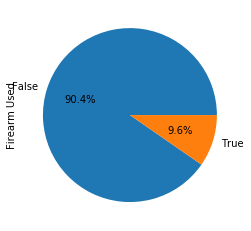

<Figure size 432x288 with 0 Axes>

In [17]:
firearm= combined_new["Firearm Used"].value_counts()

firearm_pybar= firearm.plot(kind="pie",autopct = "%1.1f%%")
plt.savefig("crimegenerder.png")
plt.show()
plt.tight_layout()

In [18]:
combined_new["Zip Code"]=pd.to_numeric(combined_new["Zip Code"])
combined_new

C:\Users\chhab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Zip Code,COVID Cases,"Crude Rate Per 100,000",Firearm Used,Report Number,Offense,Crime Description,Sex,Age,Race
2,64106.0,186.0,1994.42,False,KC20004710,Assault (Non-Aggravated),Simple Assault,M,34.0,W
3,64106.0,186.0,1994.42,False,KC20006258,Trespass of Real Property,Trespass of Real Property,M,20.0,W
5,64106.0,186.0,1994.42,False,KC20010978,Assault (Non-Aggravated),Simple Assault,M,23.0,W
8,64106.0,186.0,1994.42,False,KC20026138,Stealing – Pickpocket,Pocket-Picking,F,52.0,B
15,64106.0,186.0,1994.42,False,KC20052865,Assault (Aggravated),Aggravated Assault,M,50.0,W
...,...,...,...,...,...,...,...,...,...,...
47575,64158.0,81.0,1606.82,False,KC20051996,Harassment / Intimidation - Domestic Violence,Intimidation,M,40.0,W
47576,64158.0,81.0,1606.82,False,KC20050902,Stealing – Shoplift,All Other Larceny,M,20.0,B
47577,64158.0,81.0,1606.82,False,KC20049356,Property Damage,Vandalism/Destruction of Property,F,40.0,W
47578,64158.0,81.0,1606.82,False,KC20049323,Stealing from Auto (Theft from Auto),All Other Larceny,M,25.0,W


In [19]:
#zip_count= combined_new["Zip Code"].value_counts()
#zip_count

In [30]:
offense_count= combined_new["Crime Description"].value_counts()
offense_count

Simple Assault                              5403
Aggravated Assault                          3699
Vandalism/Destruction of Property           2913
Motor Vehicle Theft                         2534
Theft From Motor Vehicle                    2243
All Other Offenses                          1601
Burglary/Breaking and Entering              1420
All Other Larceny                           1090
Robbery                                     1043
Theft From Building                         1027
Theft of Vehicle Parts and Accessories      1013
Trespass of Real Property                    954
Shoplifting                                  864
Intimidation                                 808
Drug / Narcotic Violations                   674
Disorderly Conduct                           450
Driving Under the Influence                  424
Stolen Property Offenses                     389
Identity Theft                               368
False Pretenses / Swindle                    336
Weapon Law Violation

In [20]:
covid=pd.DataFrame(COVID)
covid.head()

,Unnamed: 0,zip_code,cases,crude_rate_per_100_000
0,3,64106,186,1994.42
1,4,64108,217,2782.41
2,5,64109,138,1430.50
3,6,64110,171,995.58
4,7,64111,234,1314.53


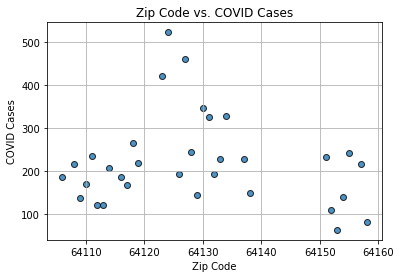

In [21]:
x_values = covid['zip_code']
y_values = covid['cases']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Zip Code')
plt.ylabel('COVID Cases')
plt.title('Zip Code vs. COVID Cases')
plt.grid()
plt.savefig("zipvscovid.png")
plt.show()

In [22]:
crime=pd.DataFrame(Crime)
crime.replace(["NaN", 'NaT'], np.nan, inplace = True)
crime_new = crime.dropna()
crime_new

,Unnamed: 0,firearm_used_flag,zip_code,report_no,offense,description,sex,age,race
1,1,False,64127.0,KC20000485,Outside State Warrant Arrest,Disorderly Conduct,M,45.0,B
17,17,False,64129.0,KC20002703,Stealing – Other,Theft From Building,F,51.0,B
21,21,False,64127.0,KC20003127,Forgery,All Other Larceny,F,32.0,B
23,23,False,64127.0,KC20003310,Rape,Forcible Rape,M,35.0,B
28,28,False,64138.0,KC20003997,Identity Theft,Identity Theft,F,26.0,B
...,...,...,...,...,...,...,...,...,...
60045,60045,False,64134.0,KC20051661,Domestic Violence Assault (Non-Aggravated),Robbery,F,28.0,B
60048,60048,False,64127.0,KC20049588,Possession/Sale/Distribution of a Controlled S...,Drug / Narcotic Violations,M,32.0,B
60050,60050,False,64134.0,KC20052335,Stealing from Auto (Theft from Auto),Theft of Vehicle Parts and Accessories,M,39.0,W
60051,60051,False,64151.0,KC20048736,Property Damage,Vandalism/Destruction of Property,M,47.0,B


In [24]:
race_count = crime_new["race"].value_counts()
race_count

W    16571
B    15862
U     1039
I       97
Name: race, dtype: int64